# Metropolis-Hastings Homework

### Problem 1

Let $X = {1,...,M}$ be a finite state space and assume that $B = [b_{ij}]$ is the transition matrix for a proposal Markov chain on $X$. Let $s = (s_1,...,s_M)$ be a desired (target) stationary distribution with every $s_i > 0$. Prove that the Markov chain produced by the Metropolis-Hastings algorithm, using $B$ as the proposal, has $s$ as its stationary distribution. Hint: Prove reversibility.

Note that since $\sum_{i=1}^{M} s_{i} = 1$ and $s_{i} > 0$ for all $1 \leq i \leq M$, if $s$ satisfies the reversibility condition, then $s$ is automatically the stationary distribution.  Also, note that if $Q$ is the transition matrix for our markov chain from the Metropolis-Hastings method, then $q_{ij} = b_{ij}a_{ij}$, because the probability that $Q$ goes from $i$ to $j$ is the probability that B goes from $i$ to $j$ times the probability that we accepted the change, $a_{ij}$.  Finally, if $0 < a_{ij} = \frac{s_{j}b_{ji}}{s_{i}b_{ij}} \leq 1$, then $\frac{1}{a_{ij}} = \frac{s_{i}b_{ij}}{s_{j}b_{ji}} \geq 1$, and so $a_{ji} = $min$\left(1,\frac{s_{i}b_{ij}}{s_{j}b_{ji}}\right) = 1$.  Similarly, if $0 < a_{ji} = \frac{s_{i}b_{ij}}{s_{j}b_{ji}} \leq 1$, then $a_{ij} = 1$, so $a_{ij} > 1 \Leftrightarrow a_{ji} = 1$, and thus we have two cases :

Case 1 : WLOG, $0 < a_{ij} \leq 1$ and $a_{ji} = 1$.

$s_{i}q_{ij} = s_{i}b_{ij}a_{ij} = s_{i}b_{ij}\frac{s_{j}b_{ji}}{s_{i}b_{ij}} = s_{j}b_{ji} = s_{j}b_{ji}a_{ji} = s_{j}q_{ji}$.

Case 2 : WLOG $a_{ij} = 0 \Rightarrow b_{ji} = 0 \Rightarrow \frac{s_{i}b_{ij}}{s_{j}b_{ji}} = \infty \Rightarrow a_{ji} = 1$.

$s_{i}q_{ij} = s_{i}b_{ij}a_{ij} = 0 = b_{ji} = s_{j}b_{ji}a_{ji} = s_{j}q_{j}$.

### Problem 2

Implement a Metropolis-Hastings sampler for the Zipf distribution. Your code should accept a positive integer $M$ as the number of states, a float $\alpha > 0$ defining the target distribution $P(k) \propto \frac{1}{k^\alpha}$, a positive integer $N$ as the total number of samples, an initial state $x_0$, and a positive integer $K$ as the length of the burn-in period. Your code should return an array $[x_K, x_{K+1},...,x_{K+N}]$ of samples from the Zipf distribution.

* Sample with $M = 20$, $\alpha = 2$, $N = 105$, $x_0 = 1$, and $K = 0$.
    
* Plot a normed histogram of your sample and on the same graph plot the target distribution (this last step will require you to compute $Z = \sum_{k=1}^{20} \frac{1}{k^2}$).

In [1]:
import numpy as np
from numpy.random import uniform as un
from matplotlib import pyplot as plt

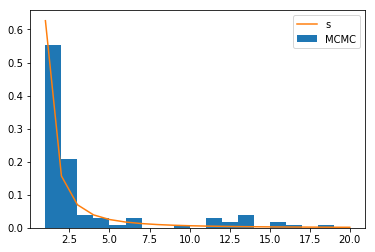

In [44]:
def metro_hast(M,a,N,x_0,K) :
    s = [1/k**a for k in range(1,M+1)]
    x = [x_0 for i in range(N)]
    B = 1/M*np.ones((M,M))
    for l in range(1,N) :
        i = x[l-1] - 1
        j = np.random.randint(M)
        a = min([1,s[j]*B[j,i]/(s[i]*B[i,j])])
        if un(0,1) <= a :
            x[l] = j + 1
        else :
            x[l] = x[l-1]
    return x[K:]

M = 20
a = 2
N = 105
x_0 = 1
K = 0
s = [1/k**a for k in range(1,M+1)]

values = metro_hast(M,a,N,x_0,K)
P = [k for k in range(1,M+1)]
Z = sum(s)
real_s = [s[r]/Z for r in range(len(s))]
plt.hist(values,normed=True,label='MCMC',bins=P)
plt.plot(P,real_s,label='s')
plt.legend(loc='best')
plt.show()